# npz 자료제작
- 이미지나 레이블은 넘파이 형식으로 저장하여서 사용하기도함.
- **한개의 넘파이는 npy**, **2개이상의 넘파이 자료는 npz** 로 저장함.
- 이미지의 폴더를 y값으로(y값은 사용자가 알아서 정하면 됨. 1,2,3,등)
- 폴더내의 **이미지를 x값의 배열**로 저장함.
- 이때 x값의 크기가 서로 다르면 배열이 아닌 list구조로 저장됨으로 **사이즈를 통일**시켜서 append해야함.

- 텐서플로우 케라스 API에서는 폴더내의 자료를 레이블화하면서 나누어서 읽고 처리하는 방법을 제공해줌 --> 이 방법을 이미지 **제네레이터**라 함
- 여기서는 제네레이터를 사용하지 않고 직접 작성하여 npz를 제작함

## 1. npz 제작(간단하게 작업)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/데이터/텐서플로우

/content/drive/MyDrive/데이터/텐서플로우


In [5]:
from glob import glob # 폴더/파일 목록 확인
glob('./이미지/*')

['./이미지/강아지', './이미지/고양이']

In [6]:
from PIL import Image
import numpy as np

folderList=glob('./이미지/*')
X=[];y=[]

for folder in folderList:
  fileList=glob(folder + '/*.jpg')  # 가끔 이미지파일 아닌 자료가 같이 있을때가 있어서 *.jpg로 명확하게 해주면 좋음.

  for file in fileList:
    img=Image.open(file)
    img=img.resize((100,100)) # 각 이미지의 크기가 다르면 다같이 학습시킬 수 없으므로 크기 맞추기!
    imgarr=np.array(img)
    X.append(imgarr)
    y.append(folder.split('/')[2])  # 또는 강아지1, 고양이2로하려면 숫자변수를 추가하여 작업할수 있음  y.append(cnt)  ; cnt+=1

In [7]:
# X와 y의 갯수가 일치해야함. 여기에서는 13개가 서로 일치해야함.
print(np.shape(X))    # (13,100,100,3은) 13개의 가로세로100,100의 3차원 컬러 이미지를 뜻함
print(np.shape(y))   # (13,) 는 13개의 이미지레이블임

(13, 100, 100, 3)
(13,)


In [8]:
# 이렇게 저장된 npz만 갖고 다니면 됨
np.savez('./강아지고양이.npz',X_data=X,y_data=y)

In [9]:
## 새 파일이라고 가정하고 npz를 불러와서 사용하면 됨
import numpy as np
loadnpz=np.load('./강아지고양이.npz')
list(loadnpz)

['X_data', 'y_data']

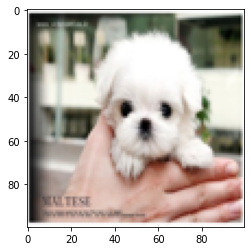

In [12]:
import matplotlib.pyplot as plt

X_data=loadnpz['X_data']
y_data=loadnpz['y_data']
plt.imshow(X_data[3])
plt.show()

In [13]:
y_data[3]

'강아지'

## 2. 멀티레이블인 대량의 자료를 npz로 저장
- 멀티레이블: 한개의 이미지에 다양한 y값이 있음
- 여기서는 색상과 종류 두가지의 값을 갖고 있음.  black_shoes

In [4]:
# 폴더생성, 이미 있으면 error, 예외처리해서 폴더명 있으면 안함 명령해야함
import os
import zipfile
os.mkdir('./csv_data') # 드라이브 마운트 된 폴더 생성

In [7]:
!pip install gdown
!gdown --id 1z1J2JlhQ9NOFKY0fP_F49rXaxDQxn-22 --output ./csv_data/clothes_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1z1J2JlhQ9NOFKY0fP_F49rXaxDQxn-22
To: /content/drive/MyDrive/데이터/텐서플로우/csv_data/clothes_dataset.zip
100% 261M/261M [00:02<00:00, 95.6MB/s]


In [8]:
with zipfile.ZipFile('./csv_data/clothes_dataset.zip', 'r') as existing_zip:
  # 원본 데이터셋을 압축 해제한 디렉터리 경x로
    existing_zip.extractall('./csv_data/nocolorinfo')

In [20]:
from glob import glob
glob('./csv_data/nocolorinfo/clothes_dataset/*') # 폴더/파일 목록 확인

['./csv_data/nocolorinfo/clothes_dataset/black_dress',
 './csv_data/nocolorinfo/clothes_dataset/black_pants',
 './csv_data/nocolorinfo/clothes_dataset/black_shirt',
 './csv_data/nocolorinfo/clothes_dataset/black_shoes',
 './csv_data/nocolorinfo/clothes_dataset/black_shorts',
 './csv_data/nocolorinfo/clothes_dataset/blue_dress',
 './csv_data/nocolorinfo/clothes_dataset/blue_pants',
 './csv_data/nocolorinfo/clothes_dataset/blue_shirt',
 './csv_data/nocolorinfo/clothes_dataset/blue_shoes',
 './csv_data/nocolorinfo/clothes_dataset/blue_shorts',
 './csv_data/nocolorinfo/clothes_dataset/brown_pants',
 './csv_data/nocolorinfo/clothes_dataset/brown_shoes',
 './csv_data/nocolorinfo/clothes_dataset/brown_shorts',
 './csv_data/nocolorinfo/clothes_dataset/green_pants',
 './csv_data/nocolorinfo/clothes_dataset/green_shirt',
 './csv_data/nocolorinfo/clothes_dataset/green_shoes',
 './csv_data/nocolorinfo/clothes_dataset/green_shorts',
 './csv_data/nocolorinfo/clothes_dataset/red_dress',
 './csv_data/

In [22]:
f = glob('./csv_data/nocolorinfo/clothes_dataset/*')
f[0].split('/')[4]

'black_dress'

In [ ]:
from PIL import Image
import numpy as np

folderList = glob('./csv_data/nocolorinfo/clothes_dataset/*')
X = []; y1 = []; y2 = []

for folder in folderList:
  fileList=glob(folder + '/*') # 각 폴더의 사진 list

  for file in fileList:
    img = Image.open(file)
    img = img.resize((112,112)) # 자료의 크기가 다른 경우 같은 크기로 맞춰야 함.
    imgarr=np.array(img)
    tmp = folder.split('/')[4]
    X.append(imgarr)
    y1.append(tmp.split('_')[0])
    y2.append(tmp.split('_')[1])

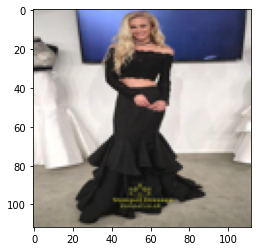

In [27]:
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.show()

In [26]:
y1[0], y2[0]

('black', 'dress')

In [ ]:
# npz 파일 제작
np.savez('./test.npz', X=X, Y1=y1, Y2=y2)